In [2]:
import os
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style = "ticks")

%matplotlib inline
cwd = os.getcwd()
print("Current working directory: {0}".format(cwd))

realestate = pd.read_csv("./data/Ames Real Estate Data.csv", low_memory = False)
HousePrice = pd.read_csv("./data/Ames_HousePrice.csv")

Current working directory: /Users/chereowang27/NYCDSA/Machine_Learning_I/Machine_Learning_Project/Ames_Housing_ML


In [3]:
realestate = pd.DataFrame(realestate)
HousePrice = pd.DataFrame(HousePrice)

In [4]:
print(realestate.shape)
print(HousePrice.shape)

(22213, 91)
(2580, 82)


In [5]:
realestate.describe()
HousePrice.describe()
print("realestate columns: ",realestate.columns)
print("HousePrice columns: ", HousePrice.columns)
HousePrice.columns.intersection(realestate.columns)

realestate columns:  Index(['MapRefNo', 'GeoRefNo', 'Tier', 'Range', 'Prop_Addr', 'ZngCdPr',
       'ZngCdSc', 'ZngOLPr', 'ZngOLSc', 'ClassPr_S', 'ClassSc_S', 'Legal_Pr',
       'SchD_S', 'TxD_S', 'MA_Ownr1', 'MA_Ownr2', 'MA_Line1', 'MA_Line2',
       'MA_City', 'MA_State', 'MA_Zip1', 'MA_Zip2', 'Rcrd_Yr', 'Rcrd_Mo',
       'Inst1_No', 'Inst1_Yr', 'Inst1_Mo', 'Inst1TPr', 'LndAc_S', 'ImpAc_S',
       'OthAc_S', 'TtlVal_AsrYr', 'ValType', 'X1TPr_D', 'X1TSc_D', 'X2TPr_D',
       'X2TSc_D', 'X1TPr_S', 'X1TSc_S', 'X2TPr_S', 'X2TSc_S', 'LndAcX1S',
       'ImpAcX1S', 'ImpAcX2S', 'HSTtl_D', 'MilVal_D', 'HSTtl_S', 'MilVal_S',
       'AcreX_S1', 'AcreGr', 'AcreNt_S', 'Neighborhood', 'LotArea', 'ParType',
       'BldgNo_S', 'DwlgNo_S', 'BldgType', 'YrBuilt', 'HouseStyle',
       'Foundation', 'RoofMatl', 'Ext1', 'Ext2', 'MasVnrType', 'Heating',
       'Central Air', 'GLA', 'TtlBsmtSF', 'TotRmsAbvGrd', 'Fireplaces',
       'PoolArea', 'GarageType', 'GarYrBlt', 'Cars', 'GarageArea',
       'YrSold_

Index(['SalePrice', 'LotArea', 'Neighborhood', 'BldgType', 'HouseStyle',
       'RoofMatl', 'MasVnrType', 'Foundation', 'Heating', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageType', 'GarageArea', 'PoolArea', 'SaleType'],
      dtype='object')

In [16]:
# HousingPrice data
# PID
#Property Location:
#                     'MSSubClass', 'MSZoning'
#
#House attributes:
#                 'GrLivArea', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
#        'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
#        'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
#        'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
#        'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
#        'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
#        'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
#        'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
#        '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
#        'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
#        'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
#        'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
#        'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
#        'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
#        'Fence', 'MiscFeature', 'MiscVal'
#
#Sale info: 
#           'SalePrice', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition'

In [17]:
# check in realestate data
# owner info: 
#            'MA_Ownr1', 'MA_Ownr2', 'MA_Line1', 'MA_Line2',
#             'MA_City', 'MA_State', 'MA_Zip1', 'MA_Zip2','Rcrd_Yr', 'Rcrd_Mo',
#              'Inst1_No', 'Inst1_Yr', 'Inst1_Mo', 'Inst1TPr'
# Property Location: 
#              'MapRefNo', 'GeoRefNo', 'Tier', 'Range', 'Prop_Addr','ZngCdPr',
#              'ZngCdSc', 'ZngOLPr', 'ZngOLSc', 'ClassPr_S', 'ClassSc_S', 'Legal_Pr',
#               'SchD_S', 'TxD_S'
# House attributes: 
#               'LndAc_S', 'ImpAc_S',
#               'OthAc_S', 'TtlVal_AsrYr', 'ValType', 'X1TPr_D', 'X1TSc_D', 'X2TPr_D',
#               'X2TSc_D', 'X1TPr_S', 'X1TSc_S', 'X2TPr_S', 'X2TSc_S', 'LndAcX1S',
#               'ImpAcX1S', 'ImpAcX2S', 'HSTtl_D', 'MilVal_D', 'HSTtl_S', 'MilVal_S',
#               'AcreX_S1', 'AcreGr', 'AcreNt_S','Neighborhood', 'LotArea', 'ParType',
#               'BldgNo_S', 'DwlgNo_S', 'BldgType', 'YrBuilt', 'HouseStyle','Foundation', 
#               'RoofMatl', 'Ext1', 'Ext2', 'MasVnrType', 'Heating','Central Air', 'GLA', 
#               'TtlBsmtSF', 'TotRmsAbvGrd', 'Fireplaces','PoolArea', 'GarageType', 'GarYrBlt', 
#                'Cars', 'GarageArea',
# sale info: 'YrSold_YYYY', 'MoSold_MM', 'SalePrice', 'SaleType', 'SaleCond',
#        'ParclRel', 'PA-Nmbr', 'PA-PreD', 'PA-Strt', 'PA-StSfx', 'PA-PostD',
#        'PA-UnTyp', 'PA-UntNo', 'Date', 'Source', 'NmbrBRs'
    


In [6]:
cols = HousePrice.columns
num_cols = HousePrice._get_numeric_data().columns

In [7]:
categorical = list(set(cols) - set(num_cols))


In [8]:
for feature in categorical: 
    print(HousePrice[feature].value_counts())
    print('')

GLQ    753
Unf    706
ALQ    397
Rec    265
BLQ    251
LwQ    139
Name: BsmtFinType1, dtype: int64

VinylSd    868
HdBoard    416
MetalSd    407
Wd Sdng    385
Plywood    194
CemntBd     97
BrkFace     80
WdShing     51
Stucco      37
AsbShng     34
BrkComm      5
AsphShn      2
CBlock       2
PreCast      1
ImStucc      1
Name: Exterior1st, dtype: int64

TA    2316
Gd     101
Fa      88
Ex       3
Po       3
Name: BsmtCond, dtype: int64

Gable      2059
Hip         473
Gambrel      18
Flat         16
Mansard      10
Shed          4
Name: RoofStyle, dtype: int64

AllPub    2578
NoSewr       2
Name: Utilities, dtype: int64

Y    2417
N     163
Name: CentralAir, dtype: int64

TA    3
Fa    2
Ex    2
Gd    2
Name: PoolQC, dtype: int64

WD       2392
New        79
COD        50
ConLD      23
CWD        11
ConLw       8
ConLI       7
Con         5
Oth         4
VWD         1
Name: SaleType, dtype: int64

VinylSd    856
MetalSd    404
HdBoard    380
Wd Sdng    369
Plywood    238
CmentBd     

In [9]:
missingRows = HousePrice.isnull().any(axis = 1)
missingCols = HousePrice.isnull().any(axis = 0)
HousePrice.columns[missingCols]


Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical',
       'BsmtFullBath', 'BsmtHalfBath', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'],
      dtype='object')

In [80]:
prop_miss

,Variable,Proportion missing
0,PoolQC,0.996512
1,MiscFeature,0.962403
2,Alley,0.934884
3,Fence,0.796512
4,FireplaceQu,0.481008
5,LotFrontage,0.179070
6,GarageFinish,0.050000
7,GarageQual,0.050000
8,GarageYrBlt,0.050000
9,GarageCond,0.050000


Text(0.5, 1.0, 'Proportion of Missing Values')

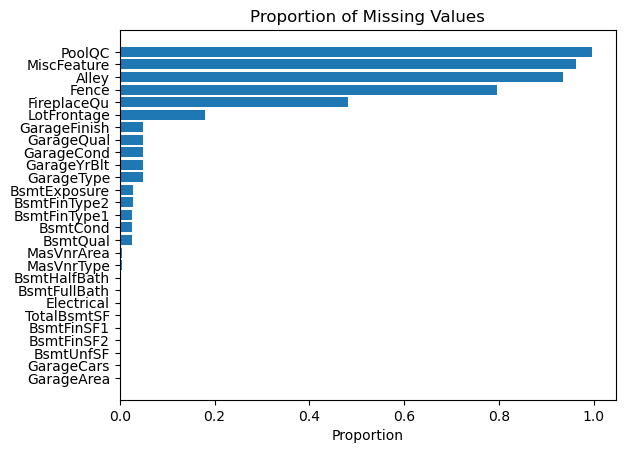

In [81]:
prop_miss = HousePrice.isna().mean().sort_values()
prop_miss = prop_miss[prop_miss>0].reset_index()
prop_miss.columns = ["Variable","Proportion missing" ]
plt.rcdefaults()
fig,ax = plt.subplots()

ax.barh(prop_miss["Variable"], prop_miss["Proportion missing"])
ax.set_xlabel("Proportion")
ax.set_title("Proportion of Missing Values")


In [32]:
#check if there are any duplicated data
print('duplicated in realestate: {}'.format(realestate.duplicated().sum()))
print('duplicated in HousePrice: {}'.format(HousePrice.duplicated().sum()))

#keep only unique rows in realestate data
realestate = realestate.drop_duplicates()
realestate.shape

duplicated in realestate: 0
duplicated in HousePrice: 0


(22208, 91)

SyntaxError: invalid syntax (<ipython-input-28-06ecb4cfafab>, line 1)